##### （一）从18.student_score.csv文件中读取同学的成绩册，处理好缺失值。

In [25]:
# 读取数据
import pandas as pd
import numpy as np
data = pd.read_csv("./student_score.csv")
# 删除至少包含一个缺失值的所在行 
data.dropna(axis=0, how='any', inplace=True, subset=None)
print(data)
# 保存为新的csv文件
data.to_csv('./Gradebook.csv')

    序号  姓名   平时成绩 实验成绩  期末成绩
0    1  张三   95.0    A  81.0
1    2  李四   94.0    B  60.0
2    3  王五   95.0    C  87.0
3    4  马七   97.0    D  75.0
4    5  梦雪   97.0    A  63.0
5    6  樱花   94.0    A  66.0
6    7  杏子   94.0    A  28.0
7    8  天涯   99.0    A  76.0
8    9  孔维   94.0    B  84.0
9   10  赵四   95.0    D  86.0
10  11  孙二  100.0    C  60.0
12  13  太良   98.0    D  83.0
13  14  丁云   95.0    D  83.0
14  15  淑萍   98.0    D  80.0
15  16  溪美   98.0    C  53.0
16  17  泰山   96.0    A  67.0
18  19  梅六   98.0    B  68.0
19  20  云霞   96.0    B  85.0


##### （二）将实验报告成绩从ABCD转换成百分制，统计出实验成绩。A为90分，B为75分，C为60分，D为40分。

In [26]:
import pandas as pd
data = pd.read_csv("./Gradebook.csv")
gender = {'A':90,'B':75,'C':60,'D':40}
data["实验成绩"] = data["实验成绩"].map(gender)
print(data)
data.to_csv('./Gradebook.csv')

    Unnamed: 0  序号  姓名   平时成绩  实验成绩  期末成绩
0            0   1  张三   95.0    90  81.0
1            1   2  李四   94.0    75  60.0
2            2   3  王五   95.0    60  87.0
3            3   4  马七   97.0    40  75.0
4            4   5  梦雪   97.0    90  63.0
5            5   6  樱花   94.0    90  66.0
6            6   7  杏子   94.0    90  28.0
7            7   8  天涯   99.0    90  76.0
8            8   9  孔维   94.0    75  84.0
9            9  10  赵四   95.0    40  86.0
10          10  11  孙二  100.0    60  60.0
11          12  13  太良   98.0    40  83.0
12          13  14  丁云   95.0    40  83.0
13          14  15  淑萍   98.0    40  80.0
14          15  16  溪美   98.0    60  53.0
15          16  17  泰山   96.0    90  67.0
16          18  19  梅六   98.0    75  68.0
17          19  20  云霞   96.0    75  85.0


#### （三）按照平时成绩20%，实验成绩30%，期末成绩50%的比例计算综合成绩，形成新的综合成绩列。

In [27]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"./Gradebook.csv")
# 再次读取原始csv文件数据，方便后面写入
data1 = pd.read_csv(r"./Gradebook.csv")

usual_grade=data["平时成绩"]
experimental_grade=data["实验成绩"]
final_grade=data["期末成绩"]

usual_grade=list(map(float, usual_grade))
experimental_grade=list(map(float, experimental_grade))
final_grade=list(map(float, final_grade))

usual_grade=[x*0.2 for x in usual_grade]
experimental_grade=[x*0.3 for x in experimental_grade]
final_grade=[x*0.5 for x in final_grade]

overall_grade=np.array(usual_grade)+np.array(experimental_grade)+np.array(final_grade)
data1['综合成绩'] = overall_grade
data1.to_csv(r"./Gradebook.csv", mode='w', index=False, encoding='utf-8-sig')
data2=pd.read_csv(r"./Gradebook.csv")
print(data2)

    Unnamed: 0.1  Unnamed: 0  序号  姓名   平时成绩  实验成绩  期末成绩  综合成绩
0              0           0   1  张三   95.0    90  81.0  86.5
1              1           1   2  李四   94.0    75  60.0  71.3
2              2           2   3  王五   95.0    60  87.0  80.5
3              3           3   4  马七   97.0    40  75.0  68.9
4              4           4   5  梦雪   97.0    90  63.0  77.9
5              5           5   6  樱花   94.0    90  66.0  78.8
6              6           6   7  杏子   94.0    90  28.0  59.8
7              7           7   8  天涯   99.0    90  76.0  84.8
8              8           8   9  孔维   94.0    75  84.0  83.3
9              9           9  10  赵四   95.0    40  86.0  74.0
10            10          10  11  孙二  100.0    60  60.0  68.0
11            11          12  13  太良   98.0    40  83.0  73.1
12            12          13  14  丁云   95.0    40  83.0  72.5
13            13          14  15  淑萍   98.0    40  80.0  71.6
14            14          15  16  溪美   98.0    60  53.0  64.1
15      

##### （四）统计全班综合成绩[90,100],[80,89],[70,79],[60-69],[0,59]各段成绩的人数，并画饼图。

<AxesSubplot:title={'center':'学生成绩区间统计图'}, ylabel='综合成绩'>

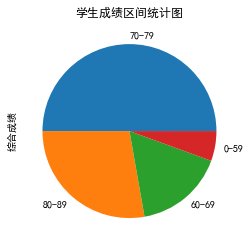

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"./Gradebook.csv")
overall_grade=list(map(float, overall_grade ))

y=pd.cut(data['综合成绩'],bins=[0,60,70,80,90,100],\
         labels=['0-59','60-69','70-79','80-89','90-100'])#分区间
num=y.value_counts()  #统计区间人数

plt.rcParams['font.sans-serif']=['SimHei']
num.plot(kind='pie',title='学生成绩区间统计图')

#### （五）将完整的成绩保存到score.csv文件中，打开excel检查输出是否正确。

In [10]:
import pandas as pd

data = pd.read_csv(r"./Gradebook.csv")
print(data)
data.to_csv(r"./score.csv", mode='w', index=False, encoding='utf-8-sig')

    Unnamed: 0.1  Unnamed: 0  序号  姓名   平时成绩  实验成绩  期末成绩  综合成绩
0              0           0   1  张三   95.0    90  81.0  86.5
1              1           1   2  李四   94.0    75  60.0  71.3
2              2           2   3  王五   95.0    60  87.0  80.5
3              3           3   4  马七   97.0    40  75.0  68.9
4              4           4   5  梦雪   97.0    90  63.0  77.9
5              5           5   6  樱花   94.0    90  66.0  78.8
6              6           6   7  杏子   94.0    90  28.0  59.8
7              7           7   8  天涯   99.0    90  76.0  84.8
8              8           8   9  孔维   94.0    75  84.0  83.3
9              9           9  10  赵四   95.0    40  86.0  74.0
10            10          10  11  孙二  100.0    60  60.0  68.0
11            11          12  13  太良   98.0    40  83.0  73.1
12            12          13  14  丁云   95.0    40  83.0  72.5
13            13          14  15  淑萍   98.0    40  80.0  71.6
14            14          15  16  溪美   98.0    60  53.0  64.1
15      